## Imported Libraries

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("PEA01.20231009T211012.csv")

In [3]:
df.head()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,Population Estimates (Persons in April),1950,Under 1 year,Both sexes,Thousand,61.1
1,Population Estimates (Persons in April),1950,Under 1 year,Male,Thousand,31.4
2,Population Estimates (Persons in April),1950,Under 1 year,Female,Thousand,29.7
3,Population Estimates (Persons in April),1950,0 - 4 years,Both sexes,Thousand,NaN
4,Population Estimates (Persons in April),1950,0 - 4 years,Male,Thousand,NaN


In [4]:
df.columns

Index(['STATISTIC Label', 'Year', 'Age Group', 'Sex', 'UNIT', 'VALUE'], dtype='object')

In [5]:
df.shape

(5994, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5994 entries, 0 to 5993
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   STATISTIC Label  5994 non-null   object 
 1   Year             5994 non-null   int64  
 2   Age Group        5994 non-null   object 
 3   Sex              5994 non-null   object 
 4   UNIT             5994 non-null   object 
 5   VALUE            5880 non-null   float64
dtypes: float64(1), int64(1), object(4)
memory usage: 281.1+ KB


In [7]:
df.isnull()

,STATISTIC Label,Year,Age Group,Sex,UNIT,VALUE
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,True
4,False,False,False,False,False,True
...,...,...,...,...,...,...
5989,False,False,False,False,False,False
5990,False,False,False,False,False,False
5991,False,False,False,False,False,False
5992,False,False,False,False,False,False


## Exploratory data analysis

### Age Distribution Analysis

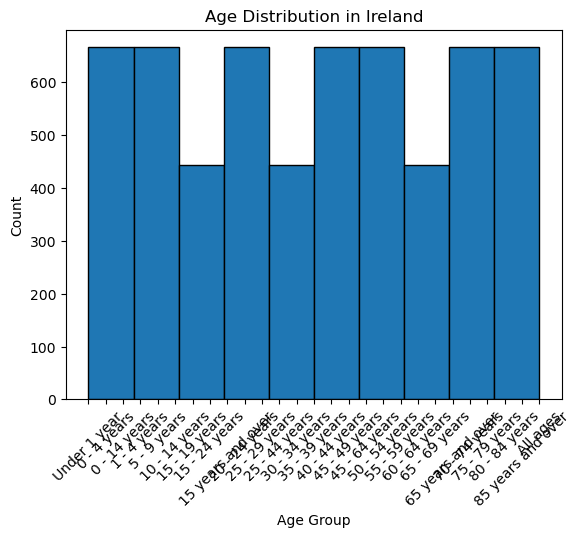

In [8]:
import matplotlib.pyplot as plt

# Create a histogram to visualize the age distribution
plt.hist(df['Age Group'], bins=10, edgecolor='k')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.title('Age Distribution in Ireland')
plt.xticks(rotation=45)
plt.show()

## Annual Population Change

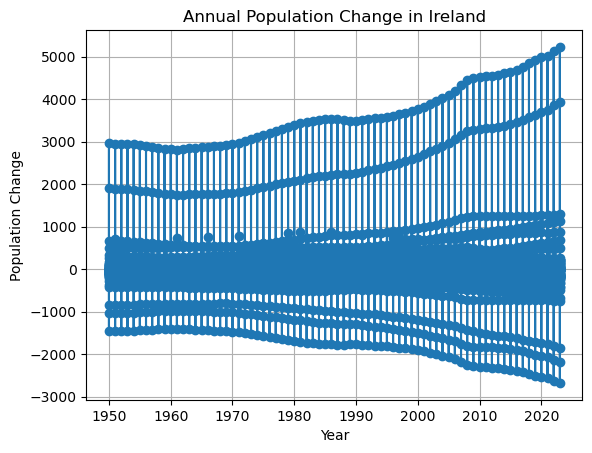

In [9]:
import matplotlib.pyplot as plt

# Calculate annual population change
df['Population Change'] = df.groupby('Year')['VALUE'].diff()

# Visualize annual population change
plt.plot(df['Year'], df['Population Change'], marker='o')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title('Annual Population Change in Ireland')
plt.grid(True)
plt.show()


# Population Forecasting (using a simple linear regression model)

## Gender Distribution

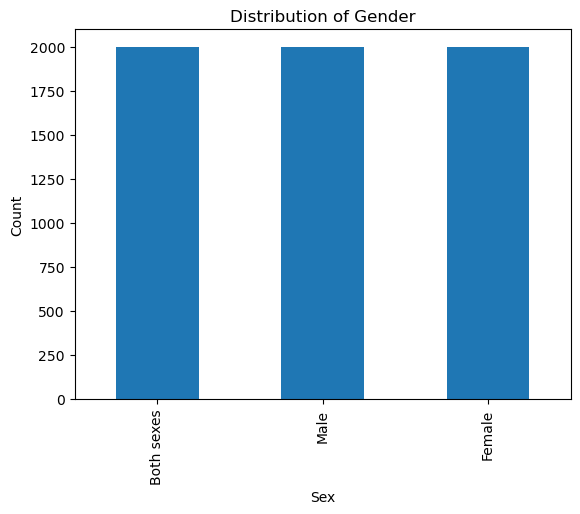

In [10]:
# Gender distribution
gender_counts = df['Sex'].value_counts()
gender_counts.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Gender')
plt.show()


## Age vs. Population

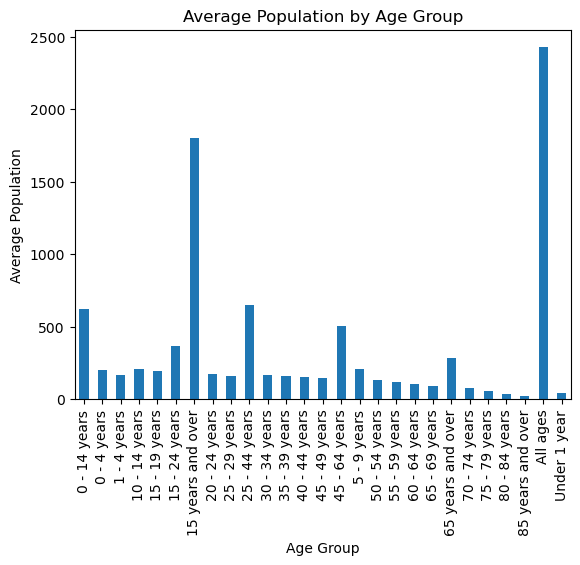

In [11]:
# Group by age group and calculate average population
age_population = df.groupby('Age Group')['VALUE'].mean()
age_population.plot(kind='bar')
plt.xlabel('Age Group')
plt.ylabel('Average Population')
plt.title('Average Population by Age Group')
plt.show()


## Yearly Population Change
#### Annual Population Change in Ireland (Indirect Indicator of Immigration and Migration

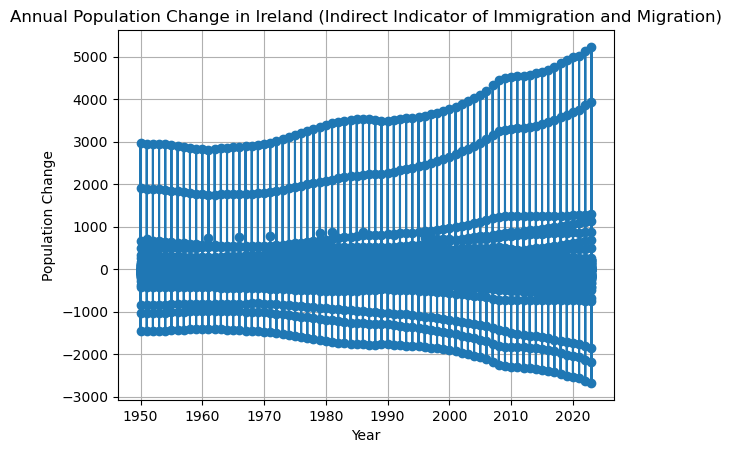

In [12]:
import matplotlib.pyplot as plt

# Calculate annual population change
df['Population Change'] = df.groupby('Year')['VALUE'].diff()

# Visualize annual population change
plt.plot(df['Year'], df['Population Change'], marker='o')
plt.xlabel('Year')
plt.ylabel('Population Change')
plt.title('Annual Population Change in Ireland (Indirect Indicator of Immigration and Migration)')
plt.grid(True)
plt.show()


## Population Forecasting in Ireland

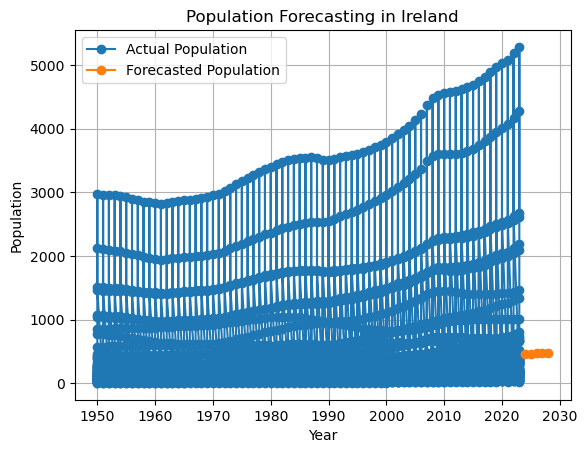

In [13]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Filter rows with non-null population values
df = df.dropna(subset=['VALUE'])

# Create a linear regression model
model = LinearRegression()

# Prepare data for population forecasting
X = df[['Year']]
y = df['VALUE']

# Fit the model
model.fit(X, y)

# Predict population for future years (e.g., the next 5 years)
future_years = np.arange(df['Year'].max() + 1, df['Year'].max() + 6)
future_population = model.predict(pd.DataFrame({'Year': future_years}))

# Visualize population forecasting
plt.plot(df['Year'], df['VALUE'], label='Actual Population', marker='o')
plt.plot(future_years, future_population, label='Forecasted Population', marker='o')
plt.xlabel('Year')
plt.ylabel('Population')
plt.title('Population Forecasting in Ireland')
plt.legend()
plt.grid(True)
plt.show()
